# ColorThiefExtractor

Extract a color palette using the ColorThief library

## Import dependencies

In [1]:
# This is a trick to import from parent directories in Jupyter Notebooks
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
import cv2
from colorthief import ColorThief, MMCQ
import tempfile
from PIL import Image
import numpy as np

import margo_loader
from ExtractorBaseClass import ExtractorBaseClass
from utils.Formatting import convert_pixel#, cvtColorWithAlpha
from utils.NotebookRenderPalette import notebook_render_palette
from utils.ImageFiles import read_img
# import multiprocessing as mp

## Define ColorThiefExtractor

In [2]:
class ColorThiefExtractor(ExtractorBaseClass):
    # https://github.com/fengsp/color-thief-py

    def __init__(self, img, color_count=20, quality=1):
        super(ColorThiefExtractor, self).__init__(img)
        self.quality = quality
        self.color_count = color_count

    def quantize(self):

        self.image = self.img
#         self.color_count = 20
#         self.quality = 1
        fp = tempfile.NamedTemporaryFile(delete=False,suffix=".png")
        cv2.imwrite(fp.name, cv2.cvtColor(self.image, cv2.COLOR_BGRA2RGBA))
        #print("Wrote to %s" % fp.name)

        # Image.fromarray(cv2.imread(fp.name)).show()
        thief = ColorThief(fp.name)

        thief.get_palette(color_count=self.color_count,quality=self.quality)

        # flatten and map everything
        pixels = np.array(self.image).reshape(self.image.shape[0] * self.image.shape[1], self.image.shape[2])

        cache = {}
        def map_color(color):
            idx = tuple(color)
            if idx not in cache: 
                cache[idx] = thief.cmap.nearest(color)
            r, g, b = cache[idx]
            return [r, g, b, 255]
        
        arr = np.uint8(np.array([map_color(x) for x in pixels]))
        ret = arr.reshape(self.image.shape)
        return ret

## Demo

## Here's the original image

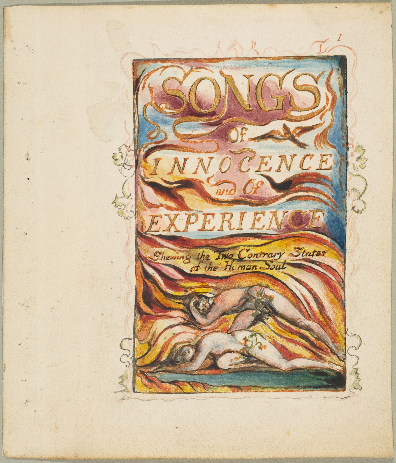

In [3]:
# :: ignore-cell ::

image = read_img("../images/sample.jpg", scale=0.125)

Image.fromarray(image)

## Run the extractor

The extractor generates a small color palette to summarize an image and can also recreate the image using only the colors in that smaller palette — a "quantized" image.

Let's take a look at the quantized image, and then the color palette it is based on.

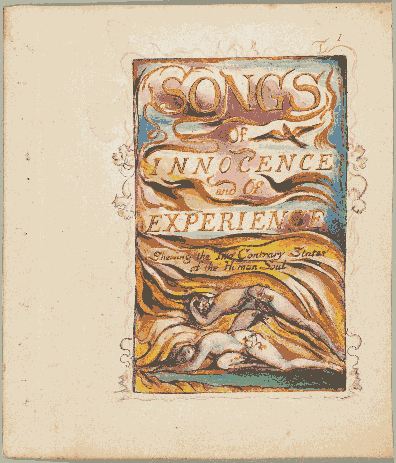

In [4]:
# :: ignore-cell ::
extracted = ColorThiefExtractor(image)
Image.fromarray(extracted.get_color_map())

In [5]:
# :: ignore-cell ::

# Preview the palette

notebook_render_palette(extracted.get_palette())